In [1]:
import pandas as pd
import numpy as np

In [2]:
ch = pd.read_csv('churnprudent.csv')

In [3]:
ch

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
ch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Converting the 'Total Charges' column to numeric, converting non-numeric values to NaN
ch['TotalCharges'] = pd.to_numeric(ch['TotalCharges'], errors='coerce')

# Filling NaN values with 0
ch['TotalCharges'].fillna(0, inplace=True)
ch

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [6]:
columns_to_convert = ["SeniorCitizen","Partner", "Dependents","PhoneService","OnlineSecurity","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","PaperlessBilling"]

# Looping through the list of columns and convert them
for column in columns_to_convert:
    ch[column] = pd.Categorical(ch[column]).codes
ch

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,2,...,2,0,0,0,One year,0,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,2,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,2,...,2,2,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,1,1,24,1,Yes,DSL,2,...,2,2,2,2,One year,1,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,1,1,72,1,Yes,Fiber optic,0,...,2,0,2,2,One year,1,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,1,1,11,0,No phone service,DSL,2,...,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,1,0,4,1,Yes,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,Yes


In [7]:
ch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int8   
 3   Partner           7043 non-null   int8   
 4   Dependents        7043 non-null   int8   
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int8   
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   int8   
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   int8   
 12  TechSupport       7043 non-null   int8   
 13  StreamingTV       7043 non-null   int8   
 14  StreamingMovies   7043 non-null   int8   
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int8   


In [8]:
columns_to_display = ["SeniorCitizen", "Partner", "Dependents","PhoneService","OnlineSecurity","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","PaperlessBilling"]

# Looping through the list of columns and displaying unique values
for column in columns_to_display:
    unique_values = ch[column].unique()
    print(f"Unique values in '{column}': {unique_values}")

Unique values in 'SeniorCitizen': [0 1]
Unique values in 'Partner': [1 0]
Unique values in 'Dependents': [0 1]
Unique values in 'PhoneService': [0 1]
Unique values in 'OnlineSecurity': [0 2 1]
Unique values in 'DeviceProtection': [0 2 1]
Unique values in 'TechSupport': [0 2 1]
Unique values in 'StreamingTV': [0 2 1]
Unique values in 'StreamingMovies': [0 2 1]
Unique values in 'PaperlessBilling': [1 0]


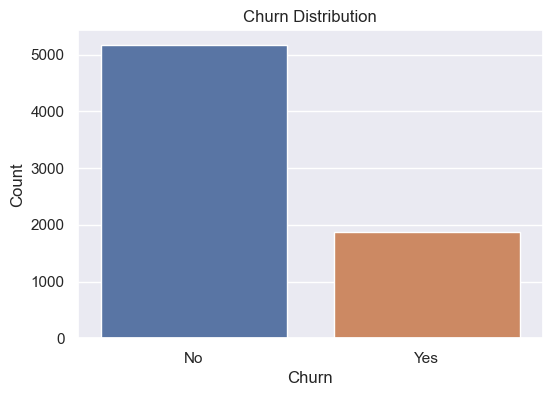

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
# Creating a count plot for the "Churn" column
sns.set(style="darkgrid")  
plt.figure(figsize=(6, 4))  
sns.countplot(data=ch, x="Churn")
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

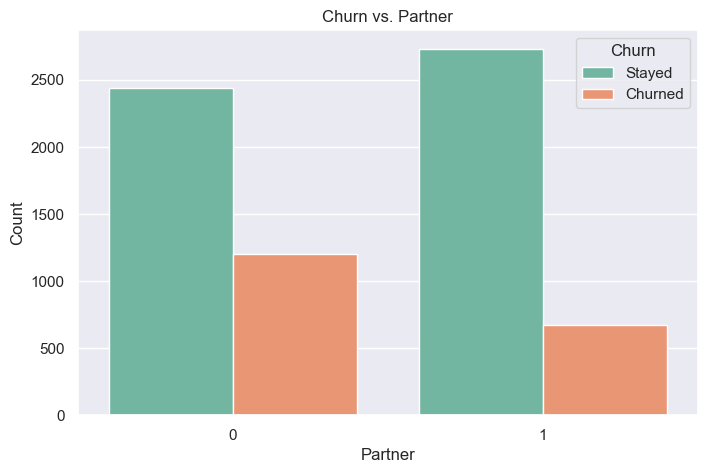

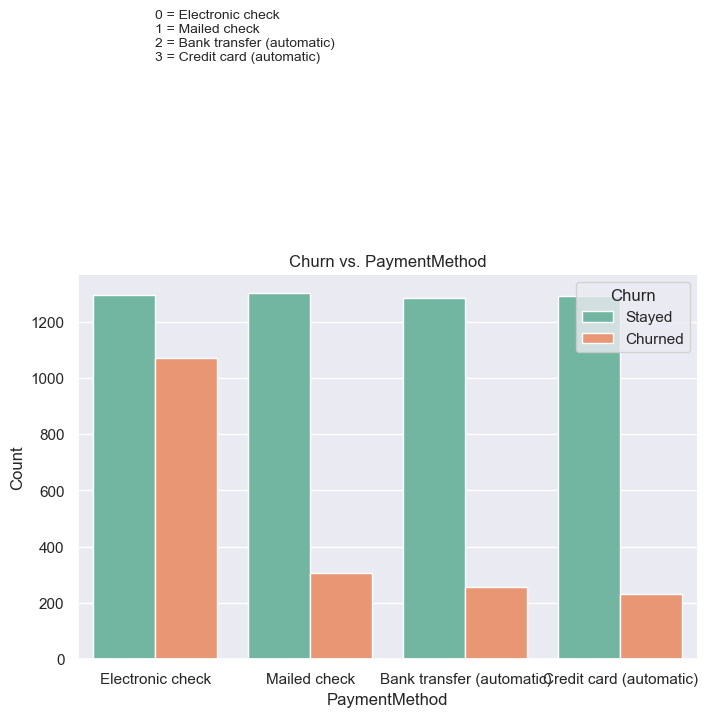

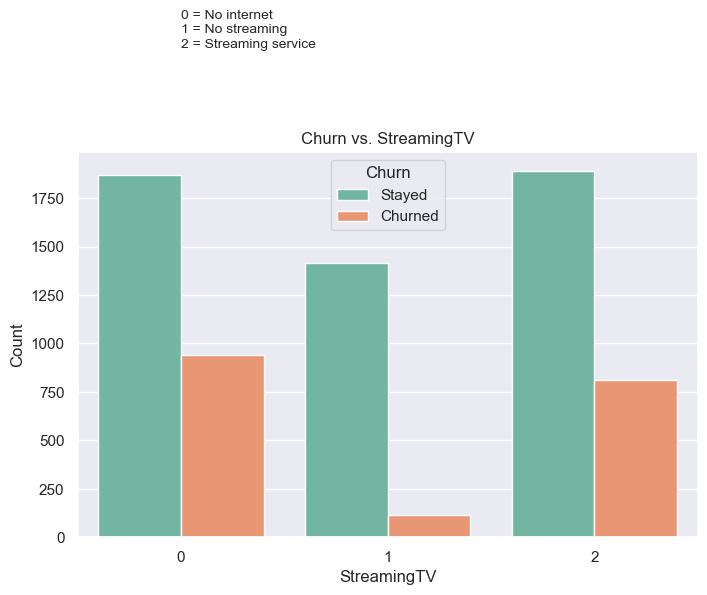

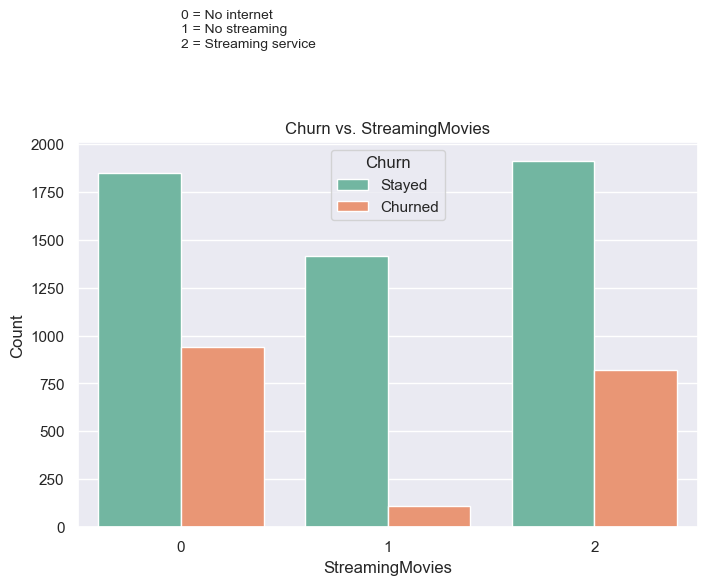

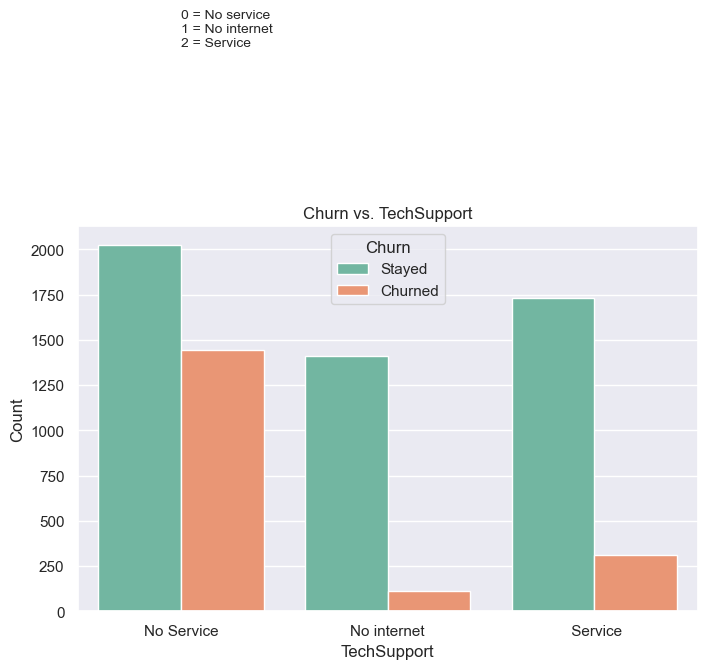

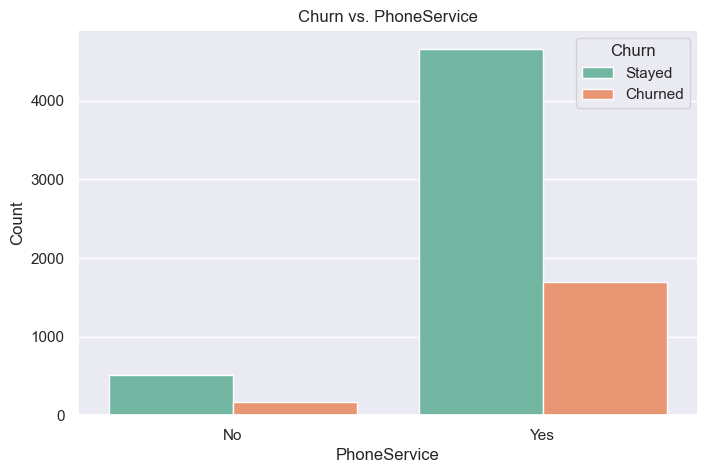

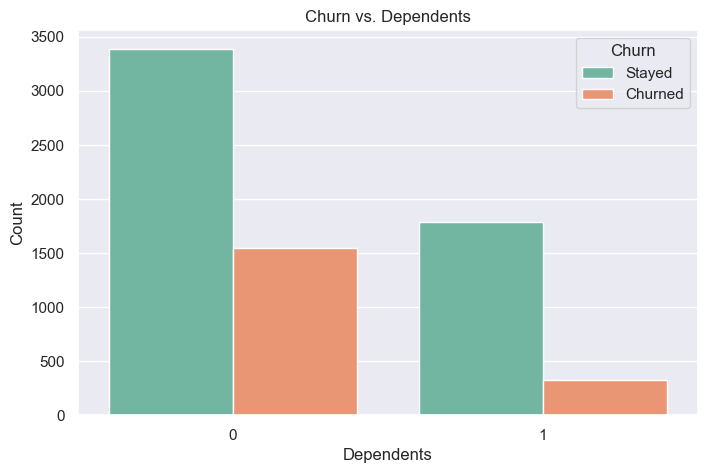

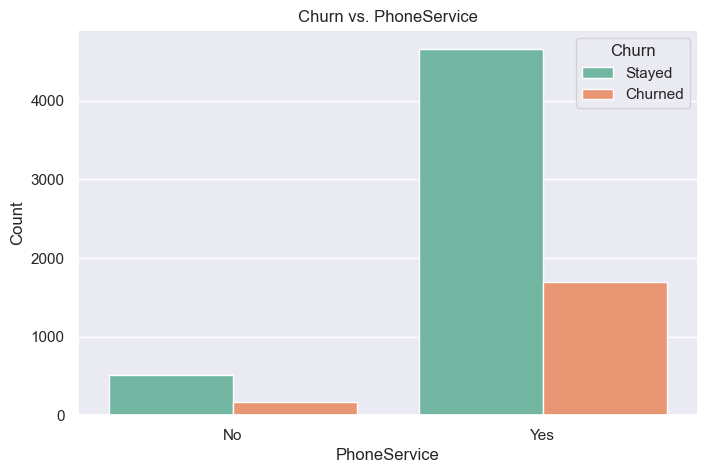

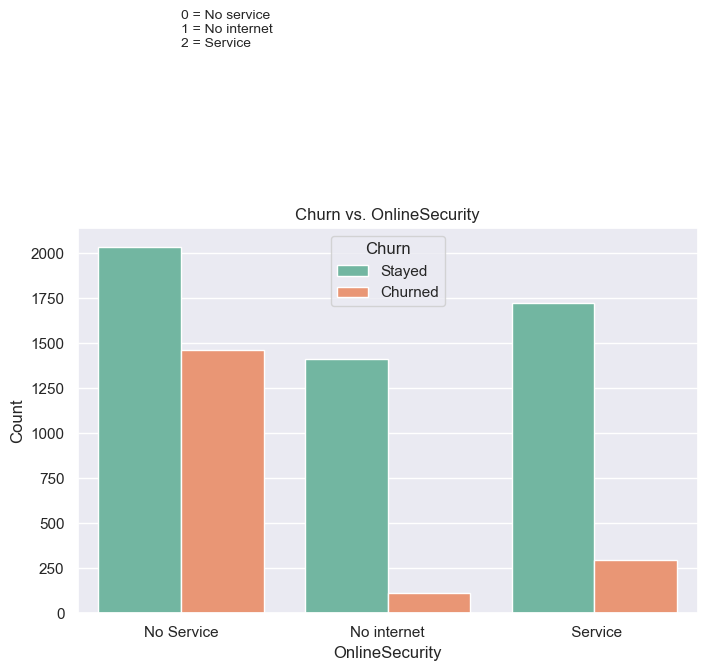

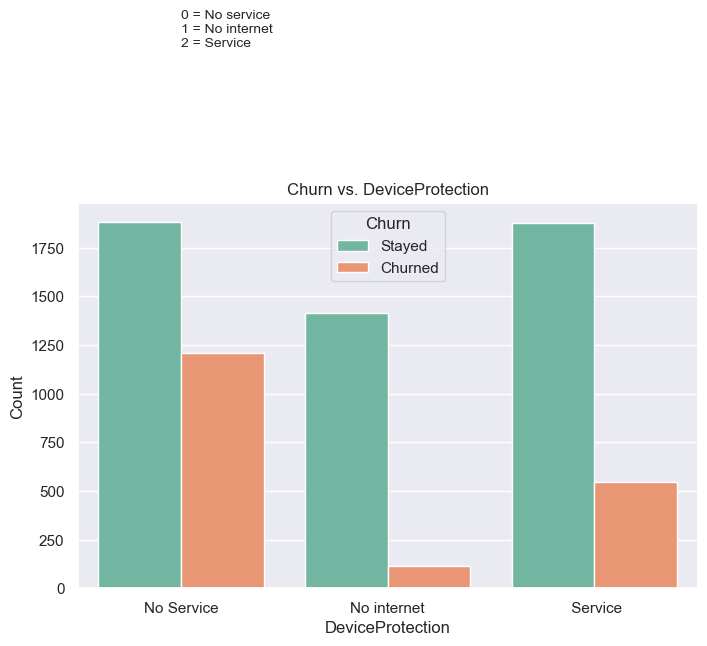

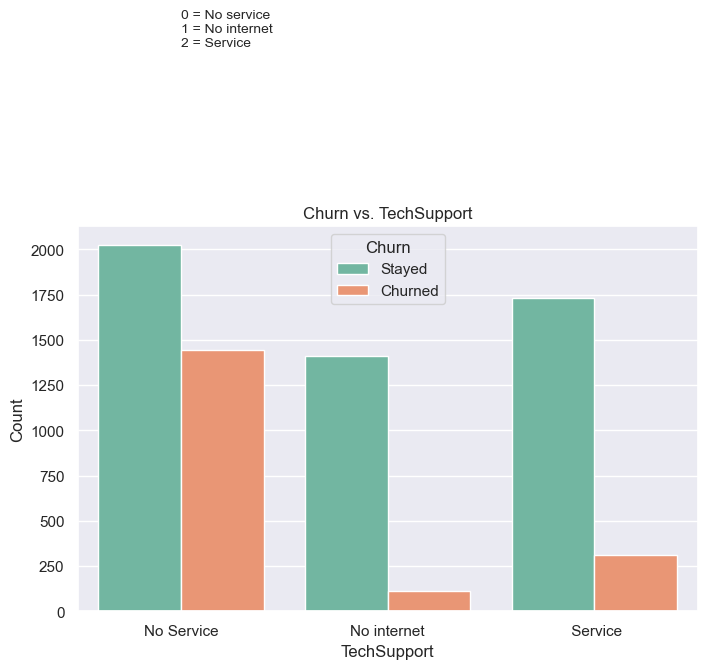

In [10]:
columns_to_plot = ['Partner','PaymentMethod','StreamingTV','StreamingMovies','TechSupport','PhoneService','Dependents', 'PhoneService', 'OnlineSecurity', 'DeviceProtection', 'TechSupport']

# Creating individual bar plots for each column
for column in columns_to_plot:
    plt.figure(figsize=(8, 5))
    sns.set(style="darkgrid")
    sns.countplot(data=ch, x=column, hue="Churn", palette="Set2")
    plt.title(f'Churn vs. {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    if column == 'PhoneService':
        plt.xticks(ticks=[0, 1], labels=["No", "Yes"])  # Customize x-axis labels for Phone Service
    elif column in ['OnlineSecurity', 'DeviceProtection', 'TechSupport']:
        plt.xticks(ticks=[0, 1, 2], labels=["No Service", "No internet", " Service"])  # Customize x-axis labels for security features
    plt.legend(title='Churn', labels=['Stayed', 'Churned'])
    
    # Adding annotations for code meanings
    if column == 'PaymentMethod':
        plt.text(0, ch[column].value_counts().max() * 0.9, '0 = Electronic check\n1 = Mailed check\n2 = Bank transfer (automatic)\n3 = Credit card (automatic)', fontsize=10)
    elif column in ['StreamingTV', 'StreamingMovies']:
        plt.text(0, ch[column].value_counts().max() * 0.9, '0 = No internet\n1 = No streaming\n2 = Streaming service', fontsize=10)
    elif column in ['TechSupport', 'DeviceProtection', 'OnlineSecurity']:
        plt.text(0, ch[column].value_counts().max() * 0.9, '0 = No service\n1 = No internet\n2 = Service', fontsize=10)
    
    plt.show()


C:\Users\MOHAMMED ESA\AppData\Local\Temp\ipykernel_31616\4247865143.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=ch[ch['Churn'] == 'No']['MonthlyCharges'], color="Red", shade=True, label="No Churn")
C:\Users\MOHAMMED ESA\AppData\Local\Temp\ipykernel_31616\4247865143.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=ch[ch['Churn'] == 'Yes']['MonthlyCharges'], color="Blue", shade=True, label="Churn")


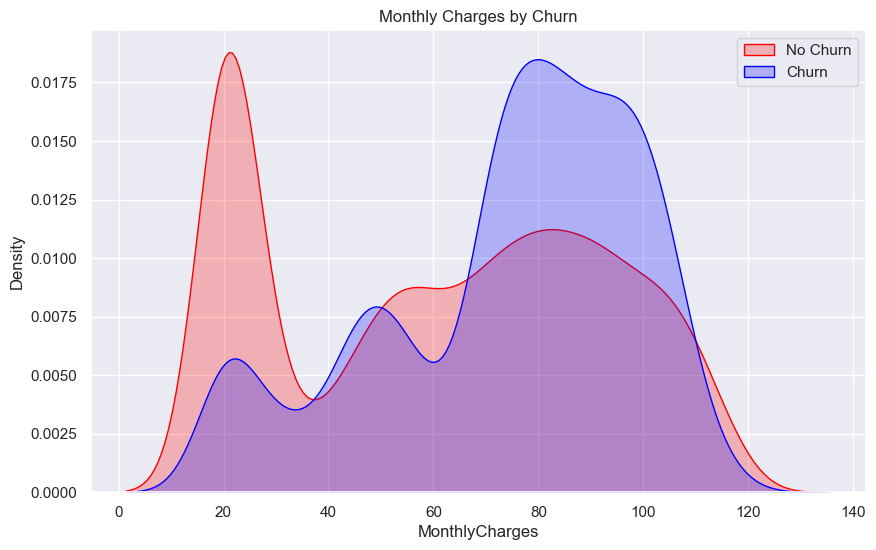

In [11]:
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
sns.kdeplot(data=ch[ch['Churn'] == 'No']['MonthlyCharges'], color="Red", shade=True, label="No Churn")
sns.kdeplot(data=ch[ch['Churn'] == 'Yes']['MonthlyCharges'], color="Blue", shade=True, label="Churn")
plt.xlabel('MonthlyCharges')
plt.ylabel('Density')
plt.title('Monthly Charges by Churn')
plt.legend(loc='upper right')
plt.show()

C:\Users\MOHAMMED ESA\AppData\Local\Temp\ipykernel_31616\2546007844.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=ch[ch['Churn'] == 'Yes']['TotalCharges'], color="Red", shade=True, label="No Churn")
C:\Users\MOHAMMED ESA\AppData\Local\Temp\ipykernel_31616\2546007844.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=ch[ch['Churn'] == 'No']['TotalCharges'], color="Blue", shade=True, label="Churn")


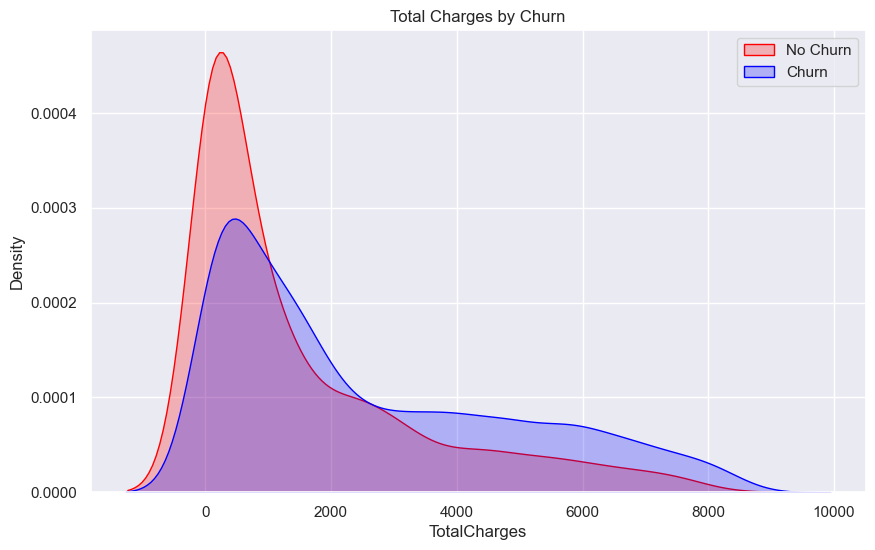

In [12]:
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
sns.kdeplot(data=ch[ch['Churn'] == 'Yes']['TotalCharges'], color="Red", shade=True, label="No Churn")
sns.kdeplot(data=ch[ch['Churn'] == 'No']['TotalCharges'], color="Blue", shade=True, label="Churn")
plt.xlabel('TotalCharges')
plt.ylabel('Density')
plt.title('Total Charges by Churn')
plt.legend(loc='upper right')
plt.show()

In [13]:
column_to_display = ['Churn']
for column in column_to_display:
    unique_values = ch[column].unique()
    print(f"Unique values in '{column}': {unique_values}")

Unique values in 'Churn': ['No' 'Yes']


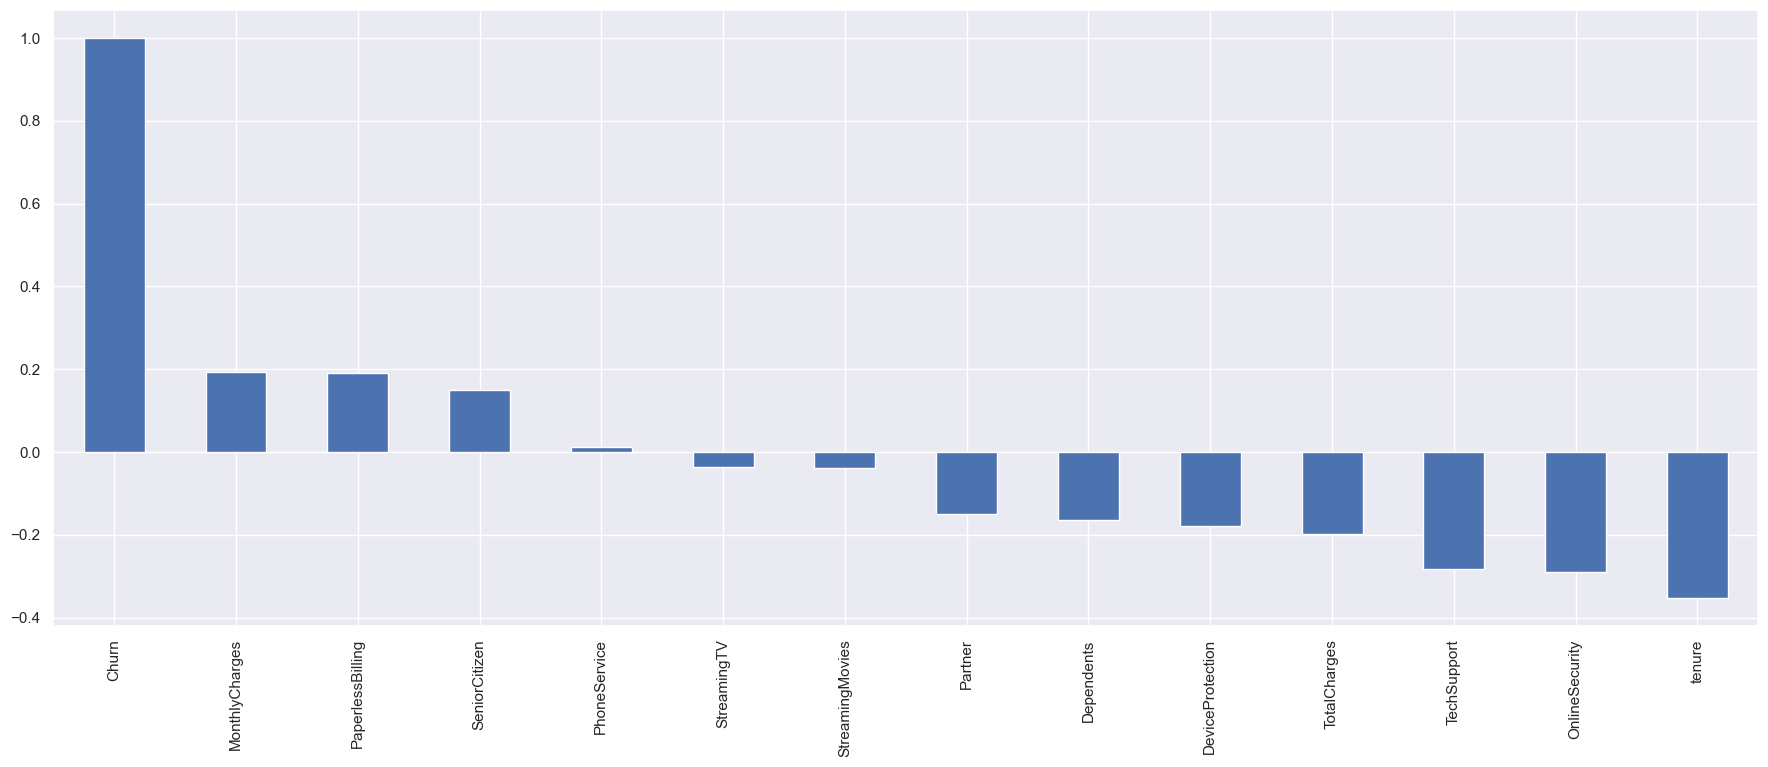

In [14]:
import matplotlib.pyplot as plt
# Excluding object variables from the DataFrame
numeric_ch = ch.select_dtypes(include=['number'])

# Converting 'Churn' column to numeric codes
numeric_ch['Churn'] = pd.Categorical(ch['Churn']).codes

# Compute correlation
correlation = numeric_ch.corr()['Churn'].sort_values(ascending=False)

# Plot correlation
plt.figure(figsize=(22,8))
correlation.plot(kind='bar')
plt.show()


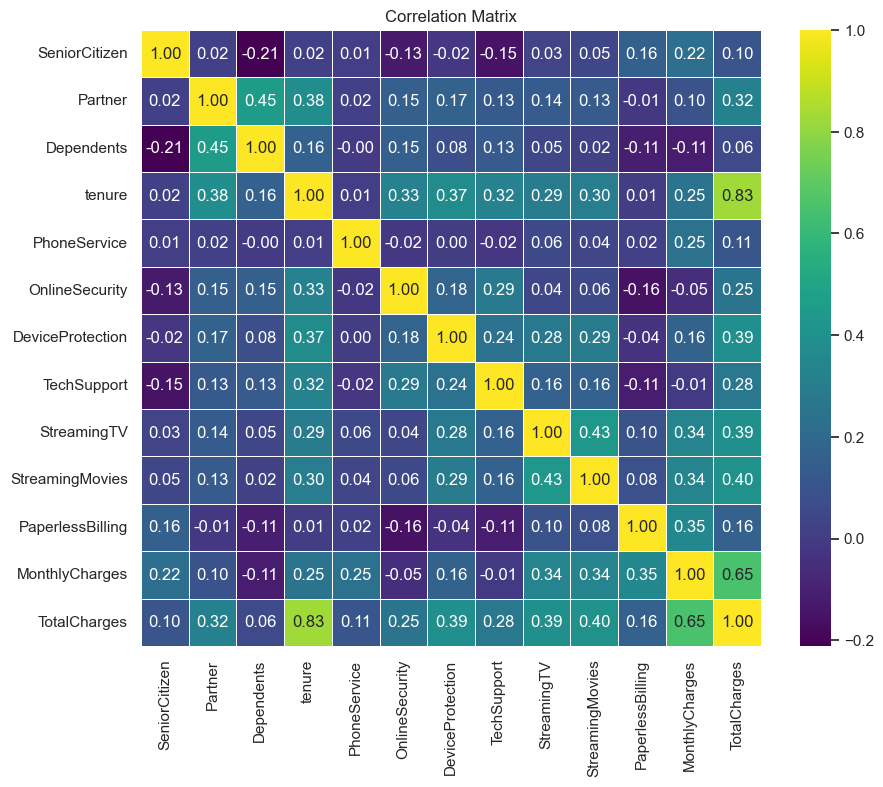

In [15]:
import seaborn as sns
numeric_ch = ch.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numeric_ch.corr()

# Setting up the heatmap
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", fmt=".2f", linewidths=0.5)

# Set title and display the plot
plt.title("Correlation Matrix")
plt.show()

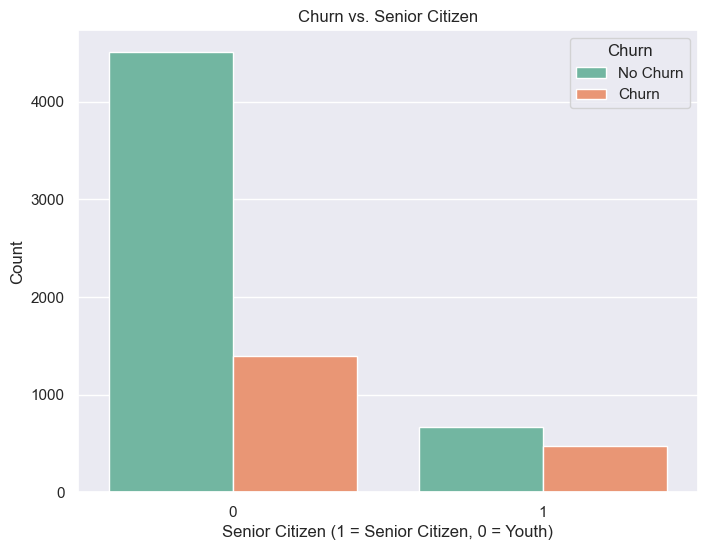

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ch, x="SeniorCitizen", hue="Churn", palette="Set2")
plt.title("Churn vs. Senior Citizen")
plt.xlabel("Senior Citizen (1 = Senior Citizen, 0 = Youth)")
plt.ylabel("Count")
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.show()


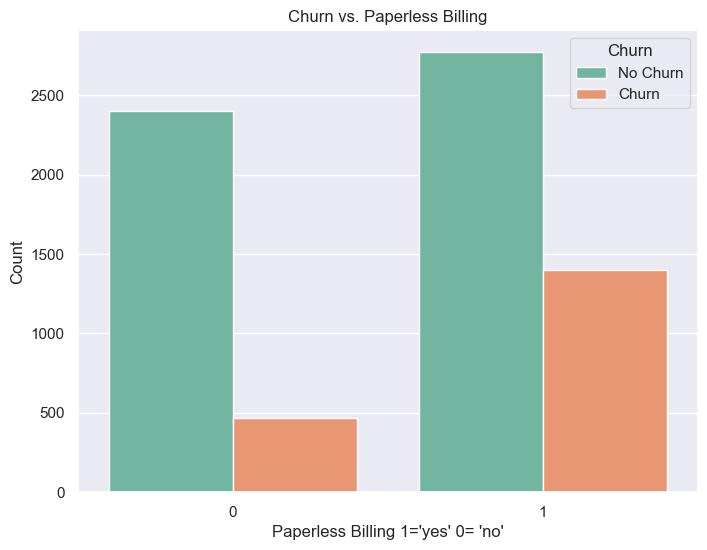

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ch, x="PaperlessBilling", hue="Churn", palette="Set2")
plt.title("Churn vs. Paperless Billing")
plt.xlabel("Paperless Billing 1='yes' 0= 'no'")
plt.ylabel("Count")
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.show()

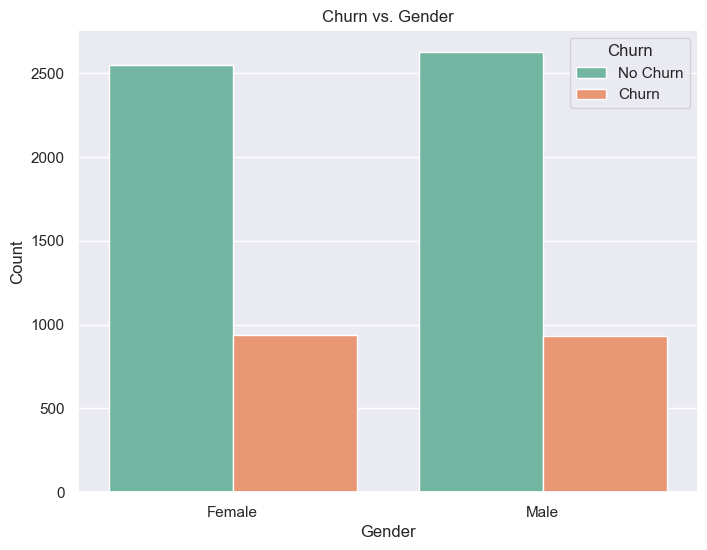

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ch, x="gender", hue="Churn", palette="Set2")
plt.title("Churn vs. Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.show()

In [19]:
#People who use paperless biling are more tend to churn
#youth are likely to churn

In [20]:
ch['MonthlyCharges'].unique()

array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ])

In [21]:
ch['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

MODEL BUILDING

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
lb = LabelEncoder()

In [24]:
ch['PaymentMethod'] = lb.fit_transform(ch['PaymentMethod'])

In [25]:
X = ch.drop(['customerID','gender','MultipleLines','InternetService','Contract','OnlineBackup','Churn'],axis=1)

In [26]:
y = ch['Churn']

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
X_train

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2142,0,0,1,21,1,2,2,0,0,2,0,3,64.85,1336.80
1623,0,0,0,54,1,0,0,0,2,2,1,0,97.20,5129.45
6074,0,1,0,1,0,0,0,0,0,0,1,2,23.45,23.45
1362,0,0,0,4,1,0,0,0,0,0,1,2,70.20,237.95
6754,0,0,1,0,1,2,0,2,0,0,1,0,61.90,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0,1,0,1,1,2,0,0,2,2,1,2,95.00,95.00
5191,0,1,1,23,1,2,2,2,2,2,1,1,91.10,2198.30
5226,0,1,1,12,1,1,1,1,1,1,1,2,21.15,306.05
5390,1,0,0,12,1,0,2,0,2,2,1,2,99.45,1200.15


In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lr = LinearRegression()

In [32]:
ch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int8   
 3   Partner           7043 non-null   int8   
 4   Dependents        7043 non-null   int8   
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int8   
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   int8   
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   int8   
 12  TechSupport       7043 non-null   int8   
 13  StreamingTV       7043 non-null   int8   
 14  StreamingMovies   7043 non-null   int8   
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int8   


In [33]:
from sklearn.preprocessing import LabelEncoder

# Initializing LabelEncoder
label_encoder = LabelEncoder()

# Applying LabelEncoder to the target variable
y_train_encoded = label_encoder.fit_transform(y_train)

# Now 'Churn' column is converted to numerical format

lr.fit(X_train,y_train_encoded)

LinearRegression()

In [34]:
from sklearn.preprocessing import LabelEncoder

# Initializing LabelEncoder
label_encoder = LabelEncoder()

# Applying LabelEncoder to the target variable
y_test_encoded = label_encoder.fit_transform(y_test)

lr.score(X_test,y_test_encoded)

0.2953124764788996

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rn = RandomForestClassifier()

In [37]:
rn.fit(X_train,y_train)

RandomForestClassifier()

In [38]:
rn.score(X_test,y_test)

0.7792760823278921

In [39]:
from sklearn.metrics import accuracy_score, classification_report 
y_pred_rn = rn.predict(X_test)
report_rn = classification_report(y_test, y_pred_rn)
print(report_rn)

              precision    recall  f1-score   support

          No       0.82      0.90      0.86      1036
         Yes       0.62      0.44      0.51       373

    accuracy                           0.78      1409
   macro avg       0.72      0.67      0.69      1409
weighted avg       0.76      0.78      0.77      1409



In [40]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report 
# Creating an instance of the Gradient Boosting model (e.g., XGBoost, LightGBM)
gradient_boosting_model = GradientBoostingClassifier()

# Train the model on the training data
gradient_boosting_model.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred_gb = gradient_boosting_model.predict(X_test)
y_test_pred_gb
# Evaluate the model's performance
accuracy_gb = accuracy_score(y_test, y_test_pred_gb)
classification_report_gb = classification_report(y_test, y_test_pred_gb)
print(f"Gradient Boosting Accuracy: {accuracy_gb}")
print(f"Gradient Boosting Classification Report:\n{classification_report_gb}")

Gradient Boosting Accuracy: 0.8019872249822569
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

          No       0.84      0.91      0.87      1036
         Yes       0.66      0.51      0.58       373

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [41]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

In [42]:
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Creating a SMOTEENN object
sm = SMOTEENN()

# Using fit_resample instead of fit_sample
X_resampled, y_resampled = sm.fit_resample(X,y)

In [43]:
xr_train, xr_test, yr_train, yr_test = train_test_split(X_resampled, y_resampled, test_size=0.2)

In [44]:
model_dt_smote = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=6, min_samples_leaf=8)

# Train the model
model_dt_smote.fit(xr_train, yr_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [45]:
yr_predict = model_dt_smote.predict(xr_test)

# Evaluate the model
model_score_r = model_dt_smote.score(xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test, yr_predict))

0.9141630901287554
              precision    recall  f1-score   support

          No       0.91      0.91      0.91       548
         Yes       0.92      0.92      0.92       617

    accuracy                           0.91      1165
   macro avg       0.91      0.91      0.91      1165
weighted avg       0.91      0.91      0.91      1165



In [46]:
rn.fit(X_resampled, y_resampled)

# Make predictions on the test data
y_pred = rn.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print a classification report for more detailed metrics
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 0.8140525195173882
Classification Report:
               precision    recall  f1-score   support

          No       0.93      0.81      0.86      1036
         Yes       0.61      0.83      0.70       373

    accuracy                           0.81      1409
   macro avg       0.77      0.82      0.78      1409
weighted avg       0.85      0.81      0.82      1409

